In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# SP500, Stocks Ex us, WTI, Bonds, Reits
import yfinance as yf
sp500 = yf.download('^GSPC', start='2004-07-31', end='2024-08-27', interval='1mo')['Close']
efa = yf.download('EFA', start='2004-07-31', end='2024-08-27', interval='1mo')['Close']
wti = yf.download('CL=F', start='2004-07-31', end='2024-08-27', interval='1mo')['Close']
bond = yf.download('ZB=F', start='2004-07-31', end='2024-08-27', interval='1mo')['Close']
housing = pd.read_csv('ushouse.csv')
housing['DATE']=pd.to_datetime(housing['DATE'])
housing

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,DATE,CSUSHPINSA
0,2004-07-01,152.338
1,2004-08-01,153.815
2,2004-09-01,155.109
3,2004-10-01,156.300
4,2004-11-01,157.497
...,...,...
235,2024-02-01,312.776
236,2024-03-01,316.858
237,2024-04-01,320.838
238,2024-05-01,323.715


In [53]:
df = pd.concat([sp500,efa,wti,bond], ignore_index=True, axis=1, join='outer')
df.reset_index(inplace=True)
df.rename(columns={'Date':'DATE'},inplace=True)
df.rename(columns={0:'S&P 500', 1:'Stocks ex US', 2:'WTI', 3:'Bond'},inplace=True)
df = pd.merge(df,housing,on='DATE',how='outer')
df.rename(columns={'CSUSHPINSA':'Housing Price'},inplace=True)
df

,DATE,S&P 500,Stocks ex US,WTI,Bond,Housing Price
0,2004-07-01,NaN,NaN,NaN,NaN,152.338
1,2004-08-01,1104.239990,46.176666,NaN,NaN,153.815
2,2004-09-01,1114.579956,47.133331,49.639999,112.218803,155.109
3,2004-10-01,1130.199951,48.783333,51.759998,113.843803,156.300
4,2004-11-01,1173.819946,51.750000,49.130001,111.093803,157.497
...,...,...,...,...,...,...
237,2024-04-01,5035.689941,77.269997,81.930000,113.812500,320.838
238,2024-05-01,5277.509766,81.180000,76.989998,115.937500,323.715
239,2024-06-01,5460.479980,78.330002,81.540001,118.312500,325.234
240,2024-07-01,5522.299805,80.360001,77.910004,120.781250,NaN


In [54]:
df1 = pd.read_csv('Real Interest Rate vs Gold Price.csv')
df1['DATE'] = pd.to_datetime(df1['DATE'])
assets = pd.merge(df1, df, on='DATE', how='outer')
assets.rename(columns={'Close':'Gold Futures'}, inplace=True)
assets=assets[['DATE','S&P 500','Stocks ex US', 'WTI', 'Bond','Housing Price','Gold Futures','DFF','CPI','Real Interest Rate']]
assets

,DATE,S&P 500,Stocks ex US,WTI,Bond,Housing Price,Gold Futures,DFF,CPI,Real Interest Rate
0,2004-07-01,NaN,NaN,NaN,NaN,152.338,NaN,NaN,NaN,NaN
1,2004-08-01,1104.239990,46.176666,NaN,NaN,153.815,NaN,NaN,NaN,NaN
2,2004-09-01,1114.579956,47.133331,49.639999,112.218803,155.109,NaN,NaN,NaN,NaN
3,2004-10-01,1130.199951,48.783333,51.759998,113.843803,156.300,428.500000,1.760968,3.19091,-1.429942
4,2004-11-01,1173.819946,51.750000,49.130001,111.093803,157.497,451.299988,1.932000,3.62162,-1.689620
...,...,...,...,...,...,...,...,...,...,...
237,2024-04-01,5035.689941,77.269997,81.930000,113.812500,320.838,2291.399902,5.330000,3.35773,1.972270
238,2024-05-01,5277.509766,81.180000,76.989998,115.937500,323.715,2322.899902,5.330000,3.25021,2.079790
239,2024-06-01,5460.479980,78.330002,81.540001,118.312500,325.234,2327.699951,5.330000,2.97563,2.354370
240,2024-07-01,5522.299805,80.360001,77.910004,120.781250,NaN,2426.500000,5.330000,2.92357,2.406430


In [55]:
# Loop through each asset column
for column in assets.iloc[:,1:7].columns:
    # Calculate the percentage change (returns) for each asset
    assets[f'{column}_returns'] = assets[column].pct_change()
assets.to_csv('assets.csv')
assets

C:\Users\jason wang\AppData\Local\Temp\ipykernel_3956\2944479074.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  assets[f'{column}_returns'] = assets[column].pct_change()
C:\Users\jason wang\AppData\Local\Temp\ipykernel_3956\2944479074.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  assets[f'{column}_returns'] = assets[column].pct_change()
C:\Users\jason wang\AppData\Local\Temp\ipykernel_3956\2944479074.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pc

,DATE,S&P 500,Stocks ex US,WTI,Bond,Housing Price,Gold Futures,DFF,CPI,Real Interest Rate,S&P 500_returns,Stocks ex US_returns,WTI_returns,Bond_returns,Housing Price_returns,Gold Futures_returns
0,2004-07-01,NaN,NaN,NaN,NaN,152.338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-08-01,1104.239990,46.176666,NaN,NaN,153.815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009696,NaN
2,2004-09-01,1114.579956,47.133331,49.639999,112.218803,155.109,NaN,NaN,NaN,NaN,0.009364,0.020717,NaN,NaN,0.008413,NaN
3,2004-10-01,1130.199951,48.783333,51.759998,113.843803,156.300,428.500000,1.760968,3.19091,-1.429942,0.014014,0.035007,0.042707,0.014481,0.007678,NaN
4,2004-11-01,1173.819946,51.750000,49.130001,111.093803,157.497,451.299988,1.932000,3.62162,-1.689620,0.038595,0.060813,-0.050811,-0.024156,0.007658,0.053209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2024-04-01,5035.689941,77.269997,81.930000,113.812500,320.838,2291.399902,5.330000,3.35773,1.972270,-0.041615,-0.032432,-0.014909,-0.055008,0.012561,0.033372
238,2024-05-01,5277.509766,81.180000,76.989998,115.937500,323.715,2322.899902,5.330000,3.25021,2.079790,0.048021,0.050602,-0.060295,0.018671,0.008967,0.013747
239,2024-06-01,5460.479980,78.330002,81.540001,118.312500,325.234,2327.699951,5.330000,2.97563,2.354370,0.034670,-0.035107,0.059099,0.020485,0.004692,0.002066
240,2024-07-01,5522.299805,80.360001,77.910004,120.781250,NaN,2426.500000,5.330000,2.92357,2.406430,0.011321,0.025916,-0.044518,0.020866,0.000000,0.042445


In [56]:
assets.dropna(inplace=True)
returns = assets.iloc[:, -6:]
for column in assets.iloc[:,1:7].columns:
    returns.rename(columns={f'{column}_returns':f'{column}'},inplace=True)
returns
returns.to_csv('returns.csv')

In [57]:
cm = returns.corr()
cm

,S&P 500,Stocks ex US,WTI,Bond,Housing Price,Gold Futures
S&P 500,1.000000,0.859357,0.269740,-0.031730,0.137966,0.165164
Stocks ex US,0.859357,1.000000,0.355672,-0.002799,0.113229,0.275338
WTI,0.269740,0.355672,1.000000,-0.267768,0.153156,0.085399
Bond,-0.031730,-0.002799,-0.267768,1.000000,-0.092453,0.271868
Housing Price,0.137966,0.113229,0.153156,-0.092453,1.000000,-0.112755
Gold Futures,0.165164,0.275338,0.085399,0.271868,-0.112755,1.000000


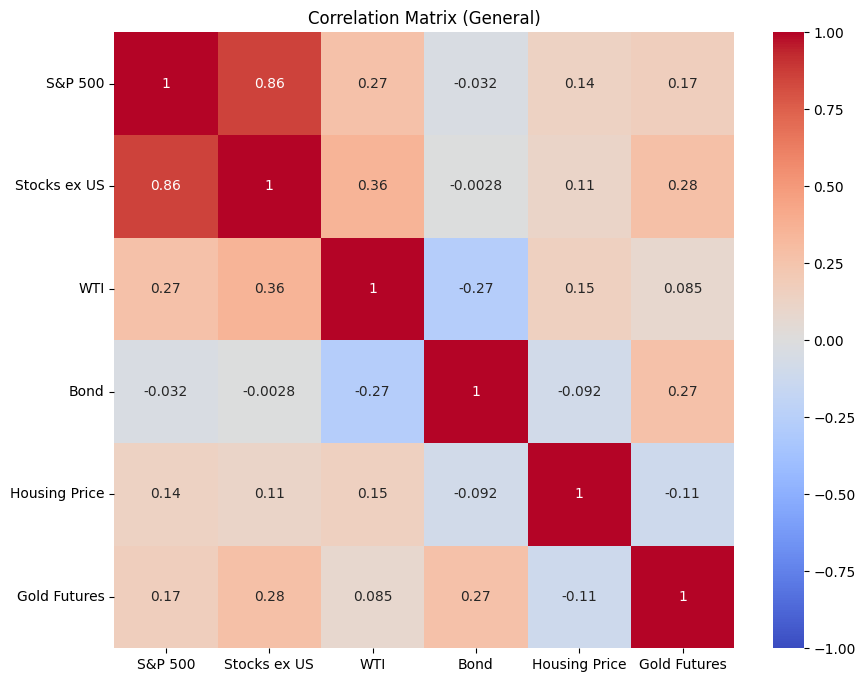

In [75]:
# Correlation matrix in general
def h_map(df,con):    
    plt.figure(figsize=(10,8))
    sns.heatmap(df,annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'Correlation Matrix ({con})')
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.savefig(f'Correlation Matrix ({con}).png')
    plt.show()
h_map(cm,'General')

In [60]:
# DFF, CPI and Real Interest Rate change
assets = pd.read_csv('assets.csv')
assets['DATE'] = pd.to_datetime(assets['DATE'])
l = ['DFF', 'CPI', 'Real Interest Rate']
for column in assets.loc[:,l].columns:
    assets[f'{column}_change'] = assets[column].diff()
assets

,Unnamed: 0,DATE,S&P 500,Stocks ex US,WTI,Bond,Housing Price,Gold Futures,DFF,CPI,Real Interest Rate,S&P 500_returns,Stocks ex US_returns,WTI_returns,Bond_returns,Housing Price_returns,Gold Futures_returns,DFF_change,CPI_change,Real Interest Rate_change
0,0,2004-07-01,NaN,NaN,NaN,NaN,152.338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2004-08-01,1104.239990,46.176666,NaN,NaN,153.815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009696,NaN,NaN,NaN,NaN
2,2,2004-09-01,1114.579956,47.133331,49.639999,112.218803,155.109,NaN,NaN,NaN,NaN,0.009364,0.020717,NaN,NaN,0.008413,NaN,NaN,NaN,NaN
3,3,2004-10-01,1130.199951,48.783333,51.759998,113.843803,156.300,428.500000,1.760968,3.19091,-1.429942,0.014014,0.035007,0.042707,0.014481,0.007678,NaN,NaN,NaN,NaN
4,4,2004-11-01,1173.819946,51.750000,49.130001,111.093803,157.497,451.299988,1.932000,3.62162,-1.689620,0.038595,0.060813,-0.050811,-0.024156,0.007658,0.053209,0.171032,0.43071,-0.259678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,237,2024-04-01,5035.689941,77.269997,81.930000,113.812500,320.838,2291.399902,5.330000,3.35773,1.972270,-0.041615,-0.032432,-0.014909,-0.055008,0.012561,0.033372,0.000000,-0.11740,0.117400
238,238,2024-05-01,5277.509766,81.180000,76.989998,115.937500,323.715,2322.899902,5.330000,3.25021,2.079790,0.048021,0.050602,-0.060295,0.018671,0.008967,0.013747,0.000000,-0.10752,0.107520
239,239,2024-06-01,5460.479980,78.330002,81.540001,118.312500,325.234,2327.699951,5.330000,2.97563,2.354370,0.034670,-0.035107,0.059099,0.020485,0.004692,0.002066,0.000000,-0.27458,0.274580
240,240,2024-07-01,5522.299805,80.360001,77.910004,120.781250,NaN,2426.500000,5.330000,2.92357,2.406430,0.011321,0.025916,-0.044518,0.020866,0.000000,0.042445,0.000000,-0.05206,0.052060


In [72]:
assets.dropna(inplace=True)
p_cpi = assets[assets['CPI_change']>0].iloc[:,-9:-3]
n_cpi = assets[assets['CPI_change']<0].iloc[:,-9:-3]

for column in assets.iloc[:,2:8].columns:
    p_cpi.rename(columns={f'{column}_returns':f'{column}'},inplace=True)
    n_cpi.rename(columns={f'{column}_returns':f'{column}'},inplace=True)
p_cpi

,S&P 500,Stocks ex US,WTI,Bond,Housing Price,Gold Futures
4,0.038595,0.060813,-0.050811,-0.024156,0.007658,0.053209
7,0.018903,0.037850,0.073651,-0.015238,0.011203,0.034851
8,-0.019118,-0.026233,0.070531,-0.015198,0.016378,-0.017869
9,-0.020109,-0.016177,-0.102527,0.031145,0.014729,0.014696
12,0.035968,0.029968,0.072035,-0.028947,0.012104,-0.013765
...,...,...,...,...,...,...
228,0.031139,0.027034,0.157984,-0.019453,0.006194,0.025714
229,-0.017716,-0.039350,0.022372,-0.023104,0.004391,-0.016392
233,0.044229,0.040458,-0.056740,0.073001,-0.003814,0.011923
235,0.051721,0.029863,0.031773,-0.025287,0.006170,-0.001318


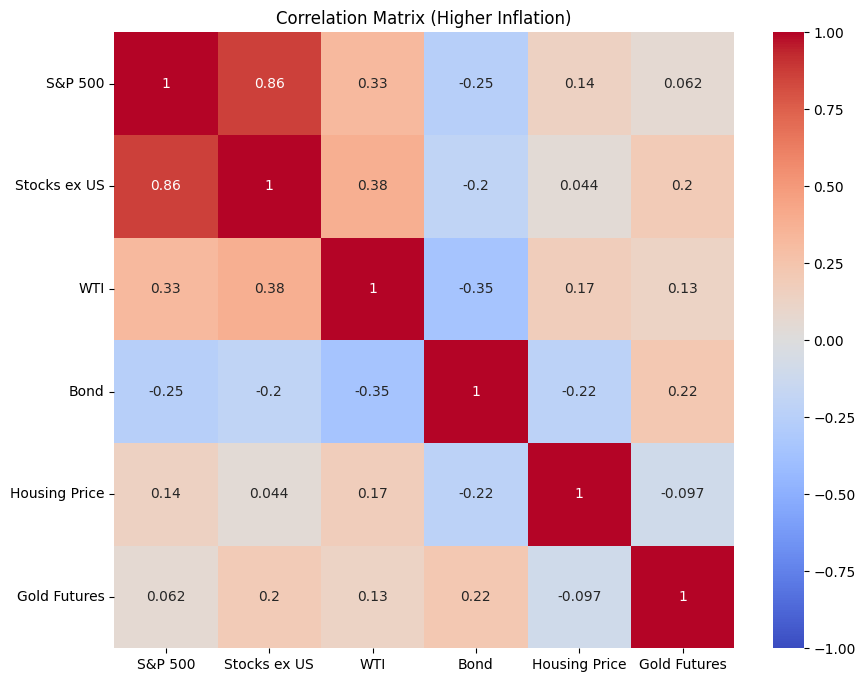

In [76]:
cm_pcpi = p_cpi.corr()
h_map(cm_pcpi,'Higher Inflation')

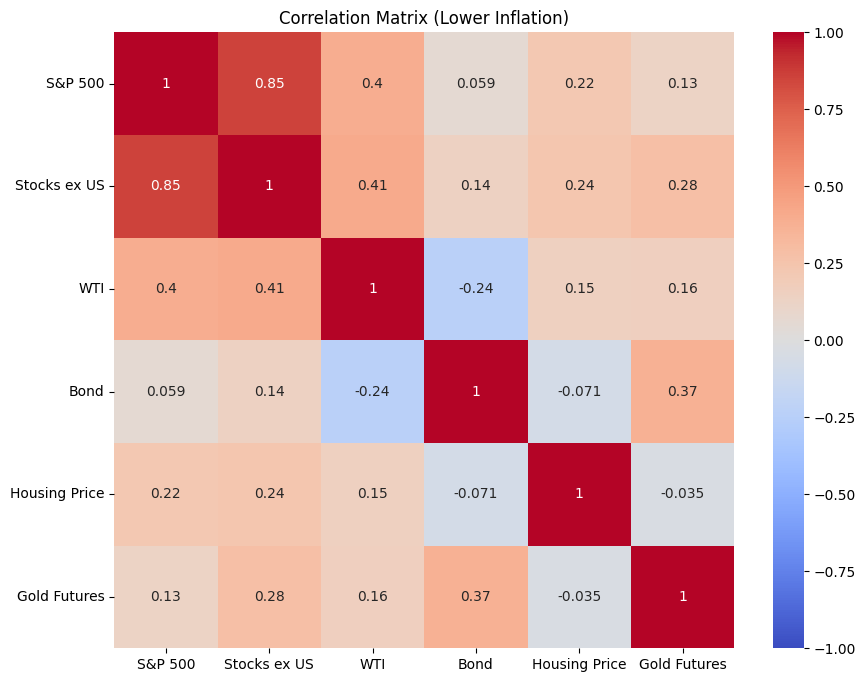

In [77]:
cm_ncpi = n_cpi.corr()
h_map(cm_ncpi,'Lower Inflation')

In [80]:
rate_hike = assets[assets['DFF_change']>0].iloc[:,-9:-3]
rate_cut = assets[assets['DFF_change']<0].iloc[:,-9:-3]

for column in assets.iloc[:,2:8].columns:
    rate_hike.rename(columns={f'{column}_returns':f'{column}'},inplace=True)
    rate_cut.rename(columns={f'{column}_returns':f'{column}'},inplace=True)
rate_hike

,S&P 500,Stocks ex US,WTI,Bond,Housing Price,Gold Futures
4,0.038595,0.060813,-0.050811,-0.024156,0.007658,0.053209
5,0.032458,0.032206,-0.115612,0.012658,0.007454,-0.030578
6,-0.025290,-0.019033,0.109321,0.020834,0.009195,-0.035886
7,0.018903,0.037850,0.073651,-0.015238,0.011203,0.034851
8,-0.019118,-0.026233,0.070531,-0.015198,0.016378,-0.017869
...,...,...,...,...,...,...
225,0.014642,0.029363,0.014669,0.003812,0.013930,0.010716
226,0.002482,-0.040071,-0.113181,-0.027296,0.012861,-0.013165
227,0.064727,0.025895,0.037450,-0.009029,0.009641,-0.021793
228,0.031139,0.027034,0.157984,-0.019453,0.006194,0.025714


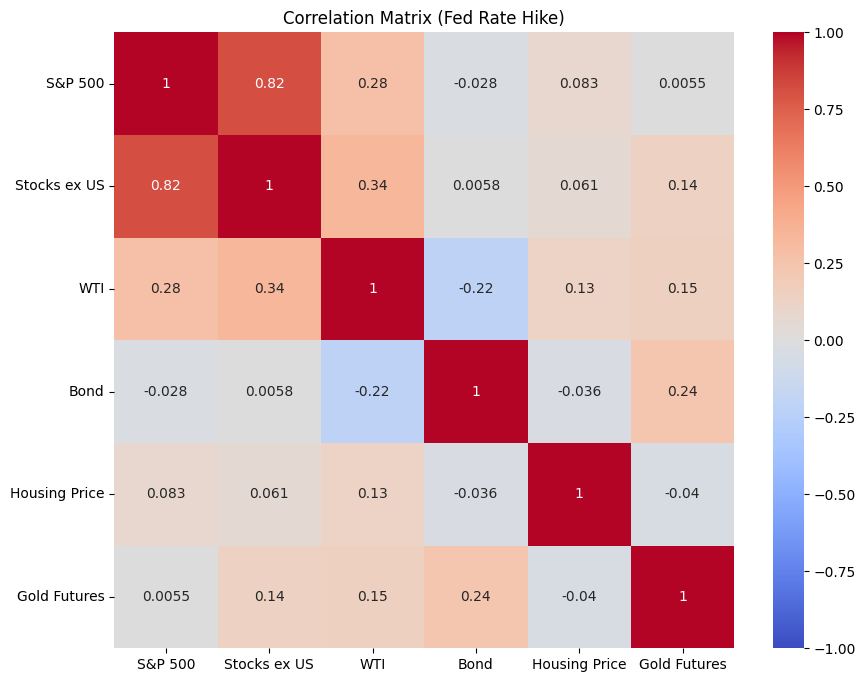

In [81]:
cm_rhike = rate_hike.corr()
h_map(cm_rhike,'Fed Rate Hike')

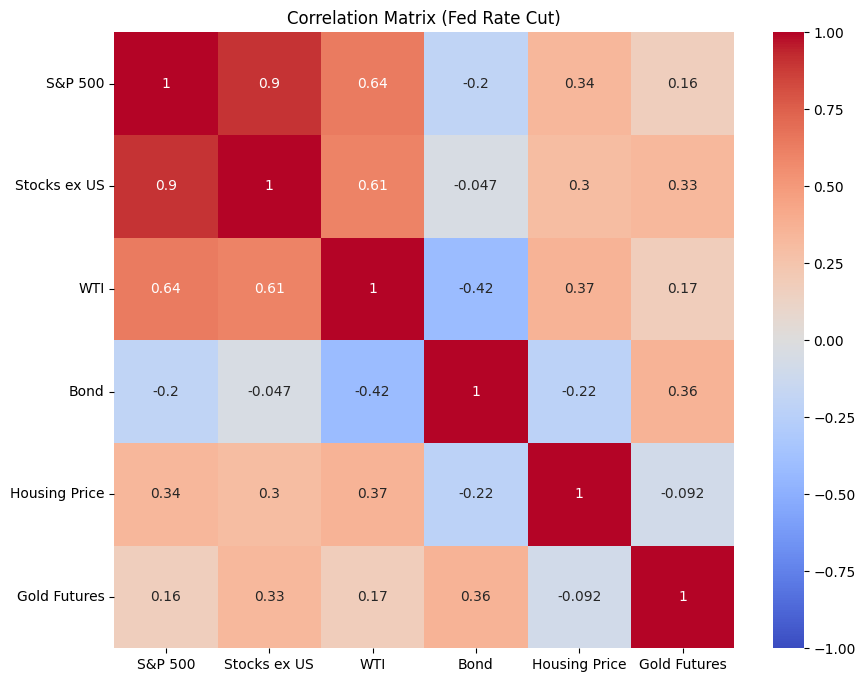

In [82]:
cm_rcut = rate_cut.corr()
h_map(cm_rcut,'Fed Rate Cut')

In [83]:
rrate_hike = assets[assets['Real Interest Rate_change']>0].iloc[:,-9:-3]
rrate_cut = assets[assets['Real Interest Rate_change']<0].iloc[:,-9:-3]

for column in assets.iloc[:,2:8].columns:
    rrate_hike.rename(columns={f'{column}_returns':f'{column}'},inplace=True)
    rrate_cut.rename(columns={f'{column}_returns':f'{column}'},inplace=True)
rrate_hike

,S&P 500,Stocks ex US,WTI,Bond,Housing Price,Gold Futures
5,0.032458,0.032206,-0.115612,0.012658,0.007454,-0.030578
6,-0.025290,-0.019033,0.109321,0.020834,0.009195,-0.035886
7,0.018903,0.037850,0.073651,-0.015238,0.011203,0.034851
9,-0.020109,-0.016177,-0.102527,0.031145,0.014729,0.014696
15,-0.017741,-0.031842,-0.097826,-0.021306,0.006430,-0.008316
...,...,...,...,...,...,...
230,-0.048719,-0.036488,0.085615,-0.064010,0.002726,-0.046486
234,0.015896,-0.004512,0.058618,-0.020760,-0.000617,-0.006788
237,-0.041615,-0.032432,-0.014909,-0.055008,0.012561,0.033372
238,0.048021,0.050602,-0.060295,0.018671,0.008967,0.013747


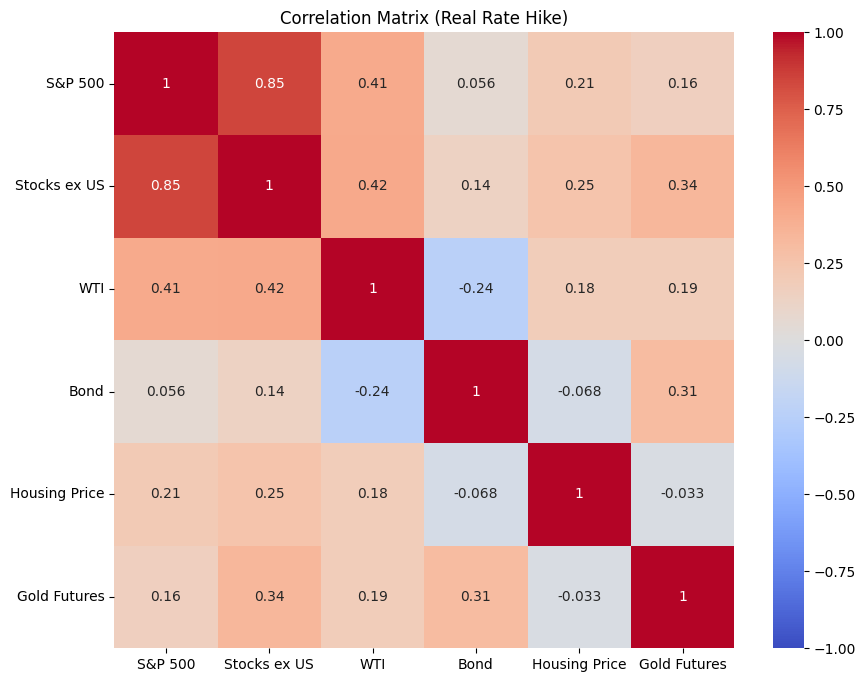

In [84]:
cm_rrhike = rrate_hike.corr()
h_map(cm_rrhike,'Real Rate Hike')

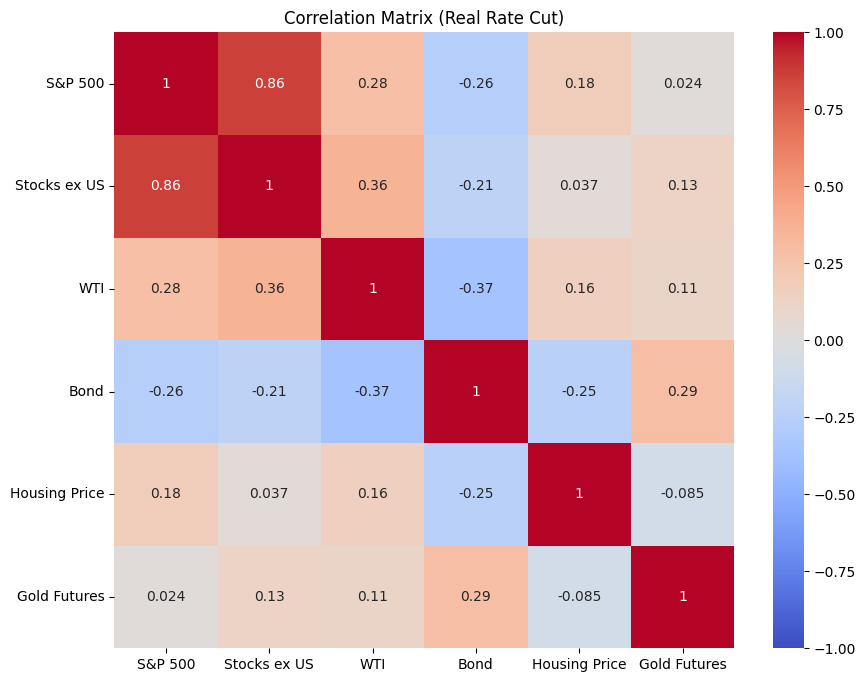

In [85]:
cm_rrcut = rrate_cut.corr()
h_map(cm_rrcut,'Real Rate Cut')

In [101]:
roll_df = pd.read_csv('assets.csv')
roll_df['5yr rolling'] = roll_df['Gold Futures_returns'].rolling(window=60).corr(roll_df['S&P 500_returns'])
roll_df.dropna(inplace=True)
roll_df

,Unnamed: 0,DATE,S&P 500,Stocks ex US,WTI,Bond,Housing Price,Gold Futures,DFF,CPI,Real Interest Rate,S&P 500_returns,Stocks ex US_returns,WTI_returns,Bond_returns,Housing Price_returns,Gold Futures_returns,5yrs rolling
63,63,2009-10-01,1036.189941,53.299999,77.000000,120.15625,148.585,1039.699951,0.118065,-0.22397,0.342035,-0.019762,-0.025238,0.090497,-0.010041,-0.006964,0.031448,0.117782
65,65,2009-12-01,1115.099976,55.279999,79.360001,115.37500,146.665,1095.199951,0.118065,2.81412,-2.696055,0.017771,-0.001986,0.030649,-0.039792,-0.008618,0.053381,0.116789
66,66,2010-01-01,1073.869995,52.480000,72.889999,118.81250,145.003,1083.000000,0.110000,2.62111,-2.511110,-0.036974,-0.050651,-0.081527,0.029794,-0.011332,-0.011139,0.115203
67,67,2010-02-01,1104.489990,52.619999,79.660004,119.18750,143.053,1118.300049,0.126429,2.15134,-2.024911,0.028514,0.002668,0.092880,0.003156,-0.013448,0.032595,0.115717
68,68,2010-03-01,1169.430054,55.980000,83.760002,116.12500,143.596,1113.300049,0.164516,2.28617,-2.121654,0.058796,0.063854,0.051469,-0.025695,0.003796,-0.004471,0.101537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,2024-02-01,5096.270020,77.250000,78.260002,119.25000,312.776,2045.699951,5.330000,3.16574,2.164260,0.051721,0.029863,0.031773,-0.025287,0.006170,-0.001318,0.341405
236,236,2024-03-01,5254.350098,79.860001,83.169998,120.43750,316.858,2217.399902,5.330000,3.47513,1.854870,0.031019,0.033786,0.062740,0.009958,0.013051,0.083932,0.344683
237,237,2024-04-01,5035.689941,77.269997,81.930000,113.81250,320.838,2291.399902,5.330000,3.35773,1.972270,-0.041615,-0.032432,-0.014909,-0.055008,0.012561,0.033372,0.336607
238,238,2024-05-01,5277.509766,81.180000,76.989998,115.93750,323.715,2322.899902,5.330000,3.25021,2.079790,0.048021,0.050602,-0.060295,0.018671,0.008967,0.013747,0.347003


C:\Users\jason wang\AppData\Local\Temp\ipykernel_3956\2669614616.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date = pd.date_range(start = '2010', periods = len(roll_df), freq = 'M') # To demonstrate date by year


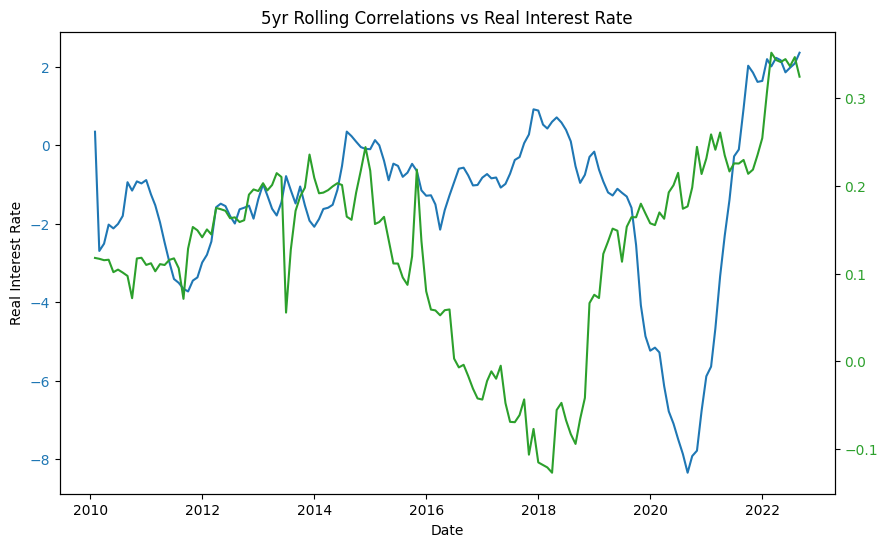

In [109]:
import matplotlib.dates as mdates
date = pd.date_range(start = '2010', periods = len(roll_df), freq = 'M') # To demonstrate date by year

fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax1.plot(date, roll_df['Real Interest Rate'],color=color)
ax1.set_xlabel('Date')
ax1.set_ylabel('Real Interest Rate')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.plot(date, roll_df['5yr rolling'],color=color, label='5 yr')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('5yr Rolling Correlations vs Real Interest Rate')
plt.savefig('5yr Rolling Correlations vs Real Interest Rate.png')
plt.show()

In [111]:
roll_df = pd.read_csv('assets.csv')
roll_df['1yr rolling'] = roll_df['Gold Futures_returns'].rolling(window=12).corr(roll_df['S&P 500_returns'])
roll_df.dropna(inplace=True)
roll_df

,Unnamed: 0,DATE,S&P 500,Stocks ex US,WTI,Bond,Housing Price,Gold Futures,DFF,CPI,Real Interest Rate,S&P 500_returns,Stocks ex US_returns,WTI_returns,Bond_returns,Housing Price_returns,Gold Futures_returns,1yr rolling
15,15,2005-10-01,1207.010010,56.250000,59.759998,111.968803,178.752,465.100006,3.779355,4.35010,-0.570745,-0.017741,-0.031842,-0.097826,-0.021306,0.006430,-0.008316,0.245217
16,16,2005-11-01,1249.479980,57.549999,57.320000,112.281303,179.673,494.600006,3.999000,3.33855,0.660450,0.035186,0.023111,-0.040830,0.002791,0.005152,0.063427,0.255520
17,17,2005-12-01,1248.290039,59.430000,61.040001,114.187500,180.107,517.099976,4.157097,3.33855,0.818547,-0.000952,0.032667,0.064899,0.016977,0.002415,0.045491,0.395909
19,19,2006-02-01,1280.660034,62.419998,61.410000,113.093750,181.499,561.599976,4.491429,3.63825,0.853179,0.000453,-0.007000,0.006062,-0.009579,0.003716,0.086057,0.111845
20,20,2006-03-01,1294.869995,64.919998,66.629997,109.156250,182.749,581.799988,4.589355,3.41792,1.171435,0.011096,0.040051,0.085002,-0.034816,0.006887,0.035969,-0.006849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,2024-02-01,5096.270020,77.250000,78.260002,119.250000,312.776,2045.699951,5.330000,3.16574,2.164260,0.051721,0.029863,0.031773,-0.025287,0.006170,-0.001318,0.643743
236,236,2024-03-01,5254.350098,79.860001,83.169998,120.437500,316.858,2217.399902,5.330000,3.47513,1.854870,0.031019,0.033786,0.062740,0.009958,0.013051,0.083932,0.618326
237,237,2024-04-01,5035.689941,77.269997,81.930000,113.812500,320.838,2291.399902,5.330000,3.35773,1.972270,-0.041615,-0.032432,-0.014909,-0.055008,0.012561,0.033372,0.490201
238,238,2024-05-01,5277.509766,81.180000,76.989998,115.937500,323.715,2322.899902,5.330000,3.25021,2.079790,0.048021,0.050602,-0.060295,0.018671,0.008967,0.013747,0.470653


C:\Users\jason wang\AppData\Local\Temp\ipykernel_3956\1821861192.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date = pd.date_range(start = '2006', periods = len(roll_df), freq = 'M') # To demonstrate date by year


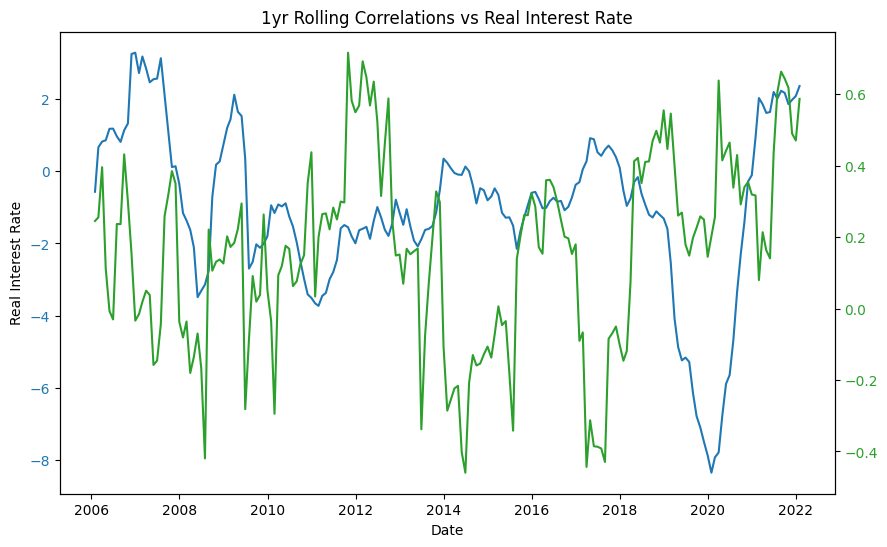

In [112]:
import matplotlib.dates as mdates
date = pd.date_range(start = '2006', periods = len(roll_df), freq = 'M') # To demonstrate date by year

fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax1.plot(date, roll_df['Real Interest Rate'],color=color)
ax1.set_xlabel('Date')
ax1.set_ylabel('Real Interest Rate')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.plot(date, roll_df['1yr rolling'],color=color, label='1 yr')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('1yr Rolling Correlations vs Real Interest Rate')
plt.savefig('1yr Rolling Correlations vs Real Interest Rate.png')
plt.show()